<a href="https://colab.research.google.com/github/mk7890/Resume-Parsing-System/blob/main/ResumeParser_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



Datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import gdown

# Replace 'FILE_ID' with the actual file ID from your link
file_id2 = "1vAaazotBSAS6tAZ17l6d1x7rCjzRp5te"
output_filename2 = "resume_dataset_with_features.csv"  # Change to desired output filename

# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id2}"

# Download the file
gdown.download(url, output_filename2, quiet=False)

print(f"File downloaded as: {output_filename2}")

Downloading...
From (original): https://drive.google.com/uc?id=1vAaazotBSAS6tAZ17l6d1x7rCjzRp5te
From (redirected): https://drive.google.com/uc?id=1vAaazotBSAS6tAZ17l6d1x7rCjzRp5te&confirm=t&uuid=f69f8284-c1a0-4b05-b0d1-f5d78c15ee14
To: /content/resume_dataset_with_features.csv
100%|██████████| 638M/638M [00:10<00:00, 62.1MB/s]

File downloaded as: resume_dataset_with_features.csv


In [14]:
structured_resume1 = pd.read_csv("/content/structured_resume_data.csv")
structured_resume2 = pd.read_csv("/content/large_resume_dataset_filled.csv")

In [13]:
structured_resume1.columns

Index(['Applicant Name', 'Job Role', 'Phone', 'Email', 'Companies Worked For',
       'Years of Work Experience', 'Skills', 'Referees', 'LinkedIn Profile',
       'Certifications', 'Education Background', 'Education Institutions'],
      dtype='object')

In [15]:
structured_resume2.columns

Index(['Applicant Name', 'Job Role', 'Phone', 'Email', 'Companies Worked For',
       'Years of Work Experience', 'Skills', 'Referees', 'LinkedIn Profile',
       'Certifications', 'Education Background', 'Education Institutions'],
      dtype='object')

In [24]:
structured_resume1.head(25)

,Applicant Name,Job Role,Phone,Email,Companies Worked For,Years of Work Experience,Skills,Referees,LinkedIn Profile,Certifications,Education Background,Education Institutions
0,Darryl Rodriguez,"Manager, Analyst",+1-810-234-8247x16972,thompsonrichard@example.com,"State B, ##ANCI",12.0,"Excel, R",No,https://linkedin.com/in/ryan73,Certifications,"Master, Bachelor's","State B, ##ANCI"
1,Allison Joseph,"Technician, Engineering",476.373.3629x1110,cpacheco@example.com,"##CI, Current Engineering, HMA, ##P, ArcV, TOP...",3.0,"Improvement, Water Utility, Microsoft Access, ...",No,https://linkedin.com/in/murphybrian,Certified Data Analysis,M.Sc. Data Science,"##CI, Current Engineering, HMA, ##P, ArcV, TOP..."
2,Christopher Williams,Specialist,294.859.3140,diana99@example.org,Amazon,9.0,"Aid, Mass Index",No,https://linkedin.com/in/barnesmary,"Certifications, Training",Diploma,UC Berkeley
3,Elizabeth Cooper,-Manager,2008-2013,johnathan90@example.com,"Microsoft Office, K, Ex, NYSE, SF, NY, NY, Sec...",13.0,"NYSE Regulation, Amex, Floor, ##SE",No,https://linkedin.com/in/areed,"Certified, Certifications","Certificate, Certificate-Project, Certificate-LMC","Microsoft Office, K, Ex, NYSE, SF, NY, NY, Sec..."
4,Neil de Grasse Tyson,"Specialist, Manager/Supervisor",1997-2004,mcgrathtina@example.net,"MEDI, Chattanooga State, Tennessee Legislature...",15.0,"African American, Modern Times, Spanish, Spani...",No,https://linkedin.com/in/xmiller,Certified Cybersecurity,"Degrees, Master, Bachelor","MEDI, Chattanooga State, Tennessee Legislature..."
5,Kathy Deleon,"Consultant, Manager, Analyst/Accounting, Analyst",396.402.6452x362,blackcassandra@example.org,"California CPA, Â, SOX Compliance, Oracle, Ora...",6.0,"Complex, Ex, 12",No,https://linkedin.com/in/medinapaul,"Coursework, Training","Master, Bachelor, Certificate","California CPA, Â, SOX Compliance, Oracle, Ora..."
6,Patrick Shaw,"Managerial/, Managerial,, Specialist",5909659824,rosspeter@example.net,"##DI, Power",12.0,"J, Microsoft Office, ##point",No,https://linkedin.com/in/charles79,"Coursework:, Training",B.Tech Mechanical,"##DI, Power"
7,John Sullivan,Manager,+1-644-967-2611x49483,frich@example.org,"CP, OPG Group, ##oHealth, I, Ohio State, OhioH...",5.0,Data Analysis,No,https://linkedin.com/in/doylesheryl,"Certified, Training",B.Tech Mechanical,"CP, OPG Group, ##oHealth, I, Ohio State, OhioH..."
8,Dale Reed,Specialist,2013-2014,josephfowler@example.net,"Rocky Mountain University, Nevada School of Ma...",19.0,"Masters of Science, Science, Screen",No,https://linkedin.com/in/snyderandrea,"Certified/Licensed, Certified, Certifications","Masters, Bachelor","Rocky Mountain University, Nevada School of Ma..."
9,Abdul Majeed,Manager,978.859.8625x8055,choikimberly@example.net,"Operation, & Finance, &, ##ation, Management, ...",18.0,MBA,No,https://linkedin.com/in/twilliams,Certifications,Master's,"Operation, & Finance, &, ##ation, Management, ..."


Merging the two datasets

In [21]:
# Merge both DataFrames
merged_resume_data = pd.concat([structured_resume1, structured_resume2], ignore_index=True)

# Remove duplicates (optional, based on 'Applicant Name' & 'Email' to avoid duplicate entries)
#merged_resume_data.drop_duplicates(subset=['Applicant Name', 'Email'], keep='first', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_resume_data.to_csv("merged_resume_data.csv", index=False)

print("Merged data saved as 'merged_resume_data.csv'")


Merged data saved as 'merged_resume_data.csv'


In [22]:
merged_resume_data.columns

Index(['Applicant Name', 'Job Role', 'Phone', 'Email', 'Companies Worked For',
       'Years of Work Experience', 'Skills', 'Referees', 'LinkedIn Profile',
       'Certifications', 'Education Background', 'Education Institutions'],
      dtype='object')

In [4]:
large_resume = pd.read_csv('/content/resume_dataset_with_features.csv')
large_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Role      1615940 non-null  object
 1   Features  1615940 non-null  object
dtypes: object(2)
memory usage: 24.7+ MB


In [5]:
large_resume.head()

,Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav..."
2,Quality Control Manager,0 to 12 Years Operations Manager PhD Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer PhD Wireless ne...
4,Conference Manager,1 to 12 Years Event Manager MBA Event planning...


In [6]:
large_resume.columns

Index(['Role', 'Features'], dtype='object')

# EDA

Generating a Word Cloud

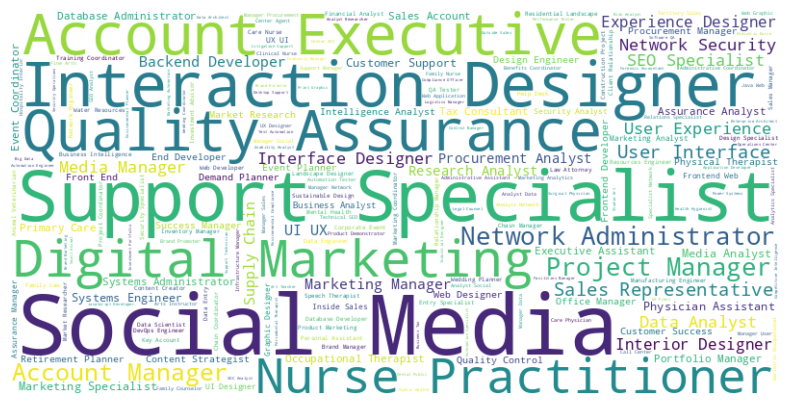

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset
df = large_resume

# Combine all job roles into a single string
text = " ".join(df['Role'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Skill Frequency

Most Popular JOBs

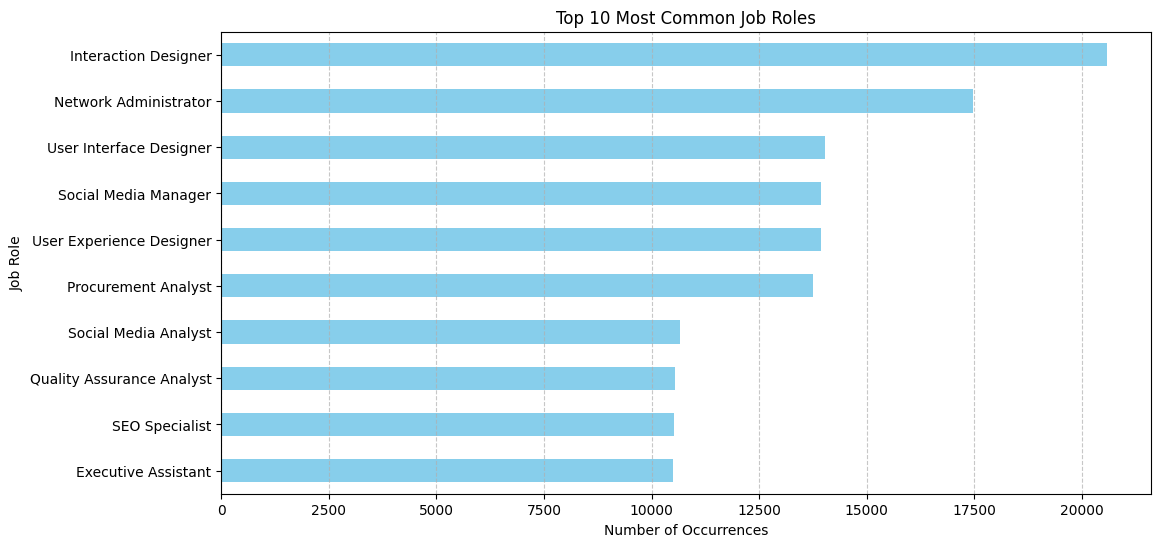

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset
df = large_resume

# Count occurrences of each job role
role_counts = df['Role'].value_counts().head(10)  # Get the top 10 most common job roles

# Plot a bar chart
plt.figure(figsize=(12, 6))
role_counts.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel("Number of Occurrences")
plt.ylabel("Job Role")
plt.title("Top 10 Most Common Job Roles")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Merged dataset

Job Role Word Cloud

In [18]:
merged_resume_data.columns

Index(['Applicant Name', 'Job Role', 'Phone', 'Email', 'Companies Worked For',
       'Years of Work Experience', 'Skills', 'Referees', 'LinkedIn Profile',
       'Certifications', 'Education Background', 'Education Institutions'],
      dtype='object')

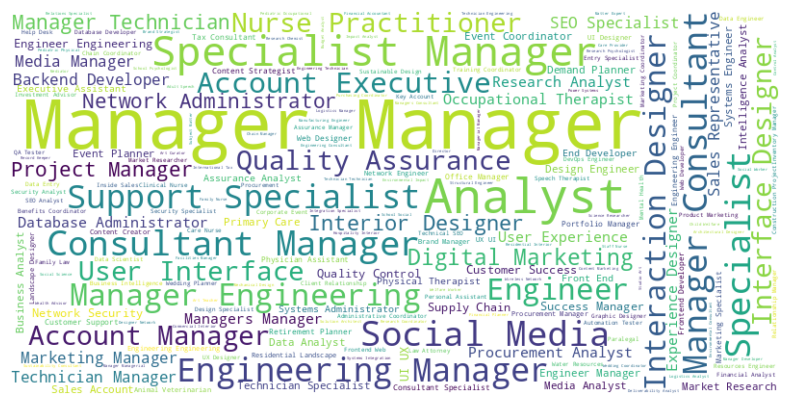

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset
df = merged_resume_data

# Combine all job roles into a single string
text = " ".join(df['Job Role'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Most Popular Jobs

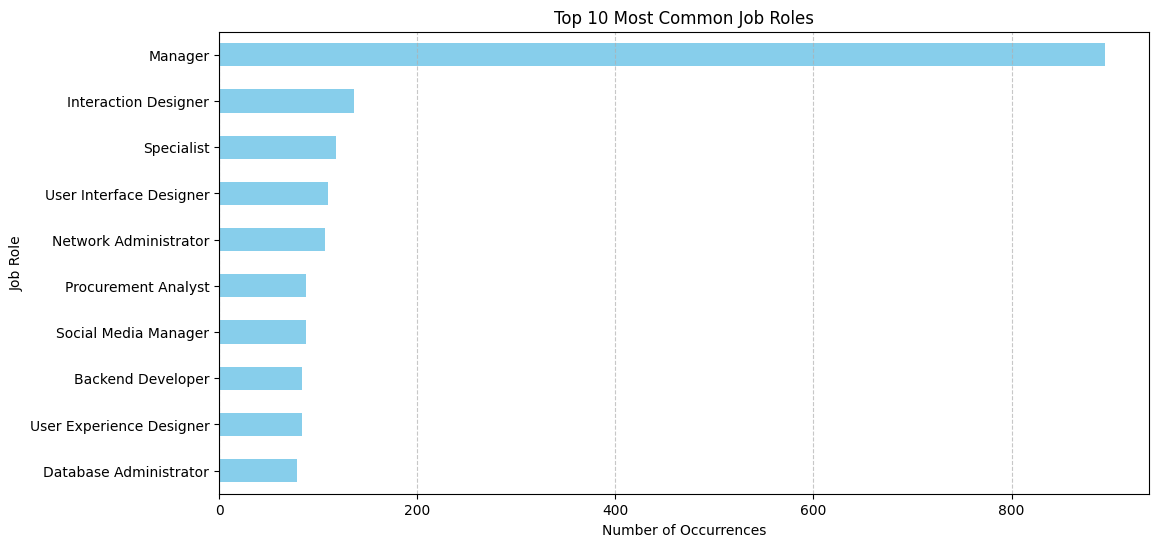

In [26]:
# Count occurrences of each job role
role_counts = df['Job Role'].value_counts().head(10)  # Get the top 10 most common job roles

# Plot a bar chart
plt.figure(figsize=(12, 6))
role_counts.sort_values().plot(kind='barh', color='skyblue')

plt.xlabel("Number of Occurrences")
plt.ylabel("Job Role")
plt.title("Top 10 Most Common Job Roles")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Skills Frequency Distribution

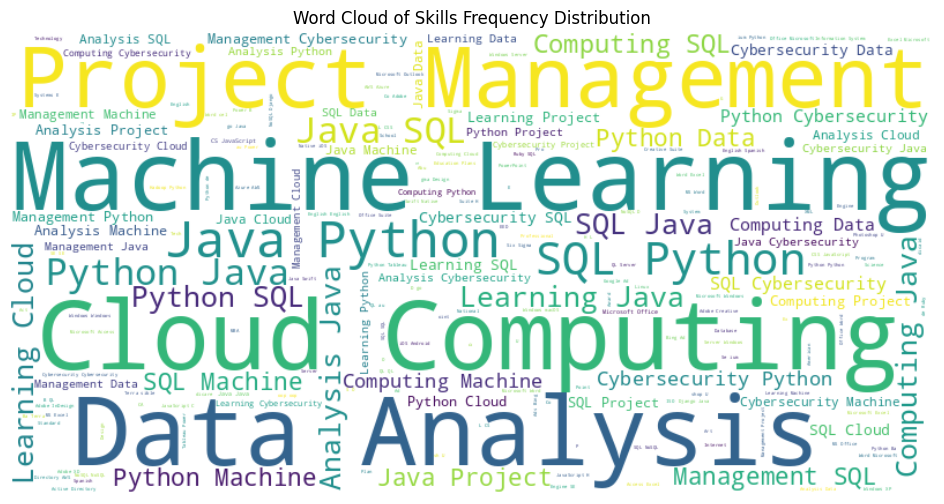

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the merged dataset
df = merged_resume_data

# Drop missing values in 'Skills' column
df['Skills'] = df['Skills'].dropna()

# Combine all skills into a single string (assuming skills are comma-separated in the dataset)
skills_text = " ".join(df['Skills'].str.replace(',', ' '))  # Replace commas with spaces

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(skills_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Skills Frequency Distribution")
plt.show()


Unique job role

In [32]:
import pandas as pd

# Load the dataset
df = large_resume

# Count unique job roles
unique_job_roles_count = df['Role'].nunique()
print(f"Total unique job roles: {unique_job_roles_count}")

# Display count of each unique job role (optional)
job_role_counts = df['Role'].value_counts()
print(job_role_counts)


Total unique job roles: 376
Role
Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: count, Length: 376, dtype: int64
